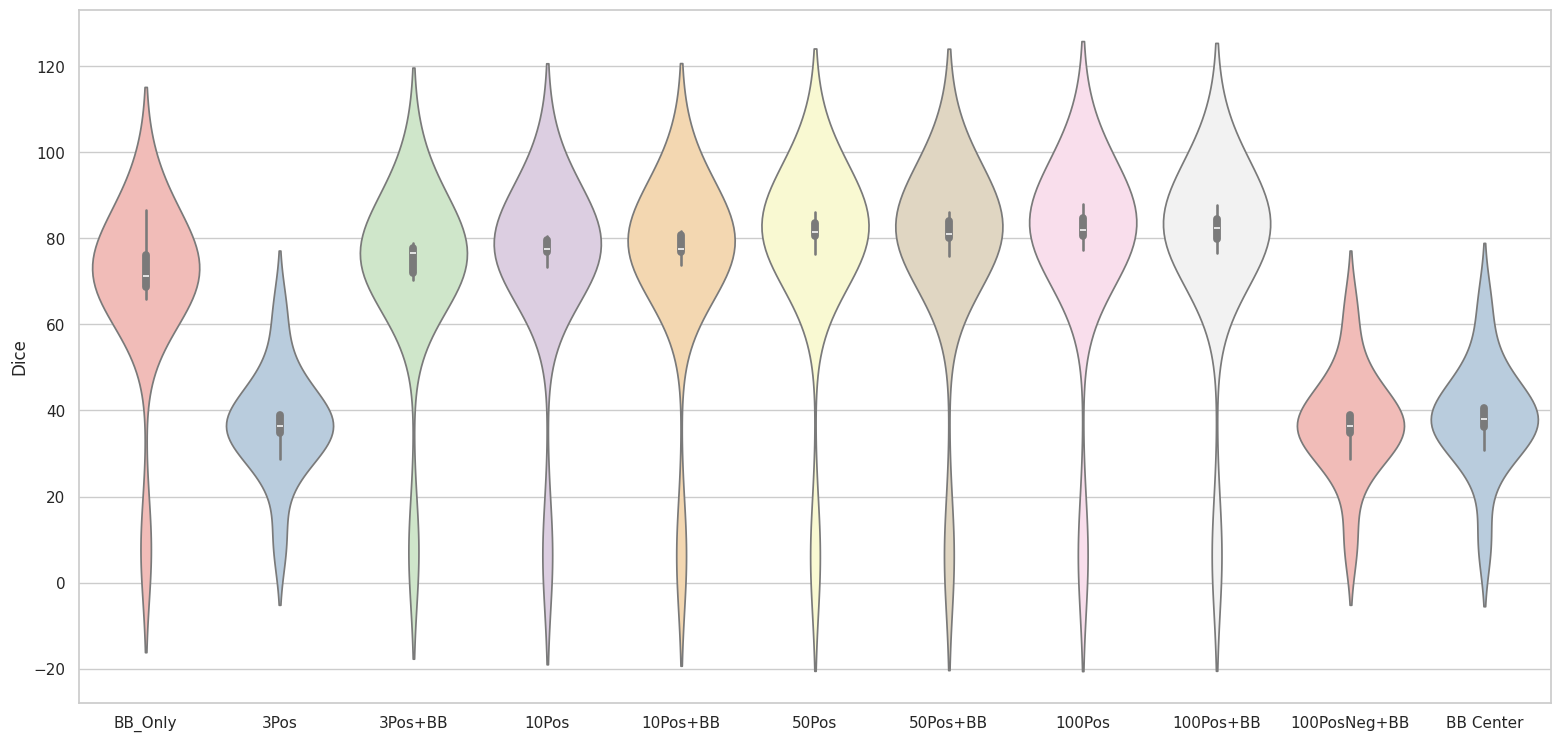

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/results_dice.xlsx')
# print(xls.sheet_names)

# Read the specific sheet into a DataFrame
df = pd.read_excel(xls, 'pathology_points')
# print(df.head())


# Create a lighter version of the default palette
# current_palette = sns.color_palette("pastel1")  # Or "muted", etc., depending on the original palette
# sns.set_palette(current_palette)

# Plot the violin plot
sns.set_theme(rc={'figure.figsize':(19,9)})
plt.rcParams.update({'font.size': 25})
# Set the style and customize the color palette
sns.set_style("whitegrid")
sns.violinplot(data=df, palette='Pastel1').set(xlabel="", ylabel="Dice")
plt.show()

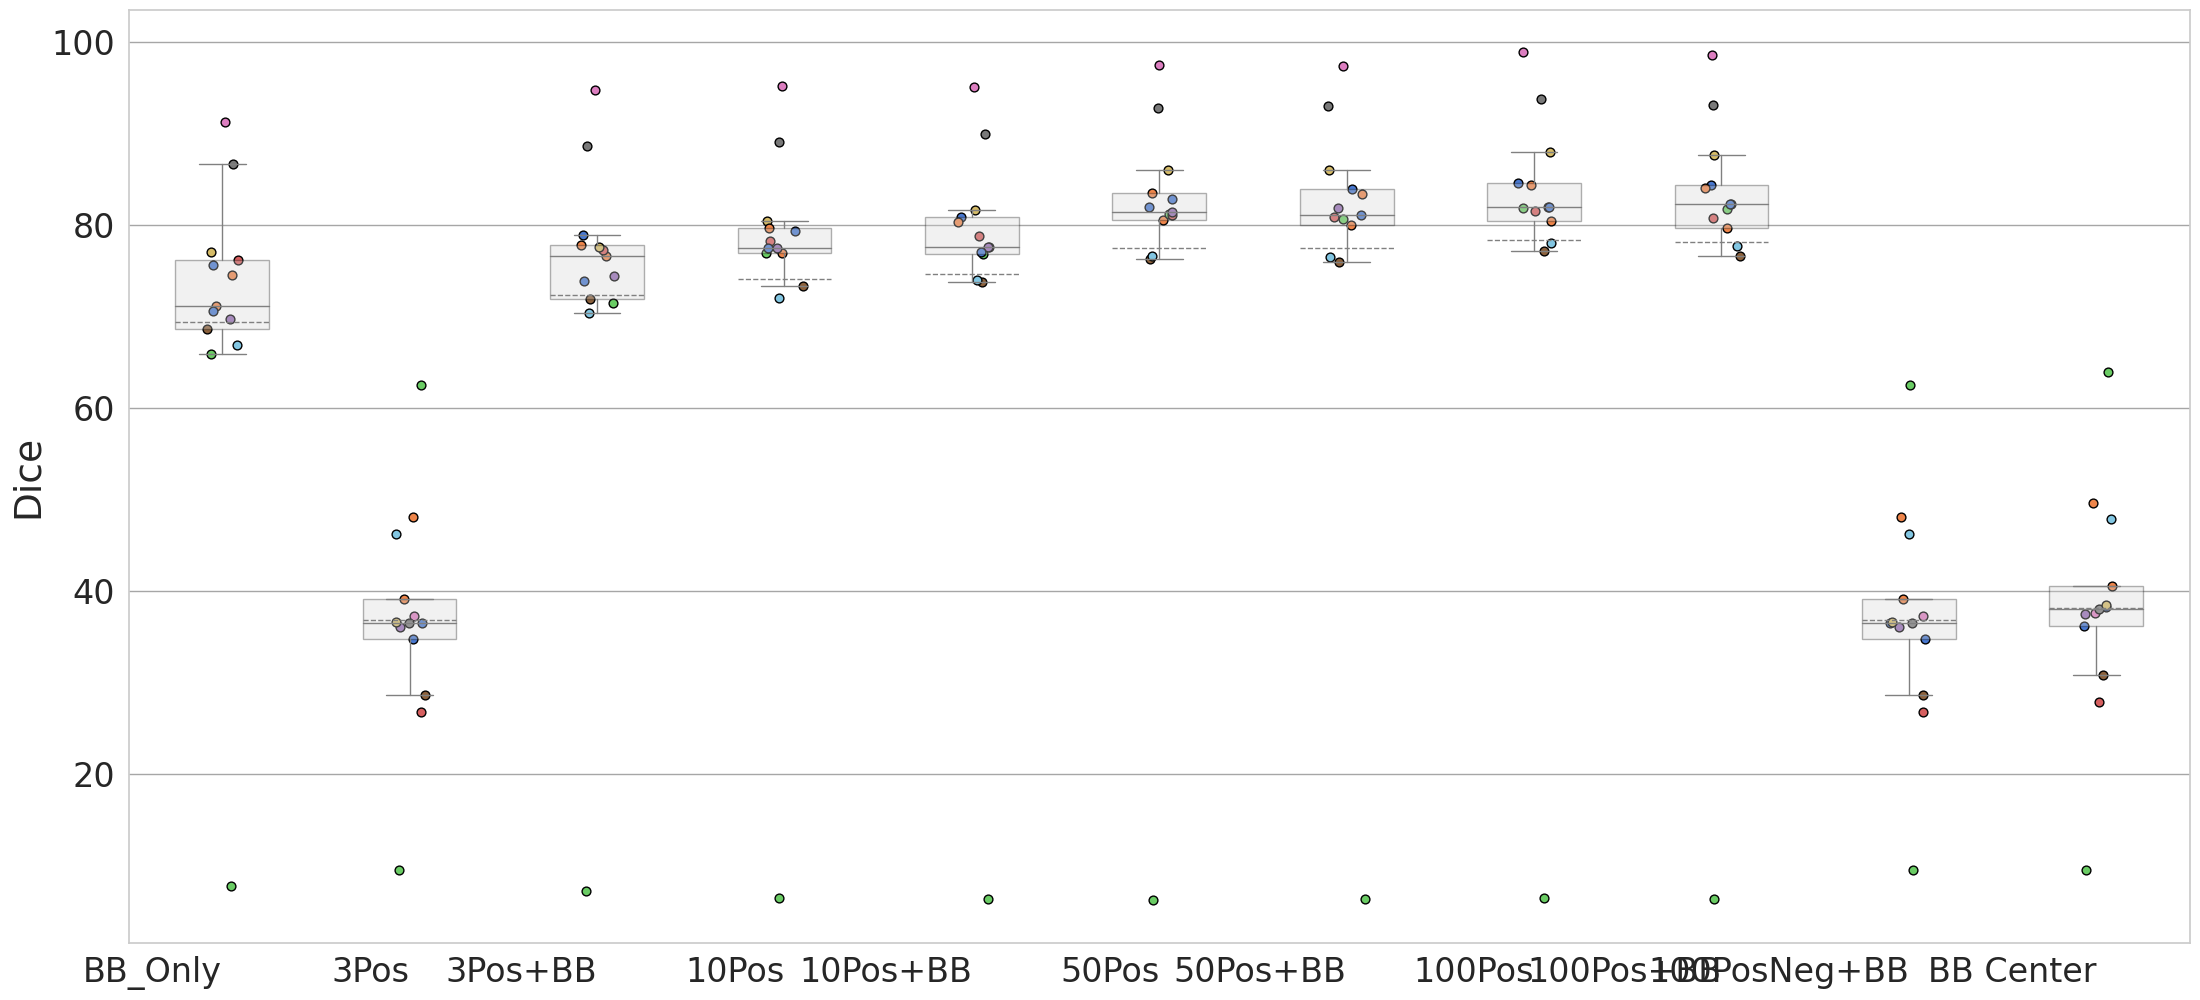

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the Excel file
xls = pd.ExcelFile('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/results_dice.xlsx')
df = pd.read_excel(xls, 'pathology_points')

# Set up the plot style
sns.set_theme(rc={'figure.figsize': (23, 11)})
# Set the style and customize the color palette
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 40})  # Uniform font size for all elements

# Generate boxplot data (transpose for boxplots to represent rows)
boxplot_data = df#.T

# Generate row-based colors
num_rows = len(df)
palette = sns.color_palette("muted", num_rows)
row_colors = {index: color for index, color in enumerate(palette)}

# Create the plot
fig, ax = plt.subplots()


# Overlay scatter points for each row
for row_index, (row_name, row_data) in enumerate(df.iterrows()):
    x_positions = np.arange(1, len(row_data) + 1)  # x-coordinates for scatter
    jittered_x = x_positions + np.random.uniform(-0.1, 0.1, size=len(row_data))  # Add jitter
    ax.scatter(jittered_x, row_data, color=row_colors[row_index], edgecolor='black', s=40, label=f"Row {row_index+1}")
    # ax.scatter(x_positions, row_data, color=row_colors[row_index], edgecolor='black', s=50, label=f"Row {row_index+1}")

# Plot gray boxplots
boxplot = ax.boxplot(boxplot_data, patch_artist=True, showmeans=True, meanline=True,sym='')

for box in boxplot['boxes']:
    box.set_facecolor('lightgray')
    box.set_alpha(0.3)

for element in ['whiskers', 'caps', 'medians', 'means']:
    plt.setp(boxplot[element], color='gray')

# Beautify plot
ax.set_xticks(np.arange(1, len(df.columns) + 1))
ax.set_xticklabels(df.columns, ha="right")  # Use column names as x-labels
ax.set_xlabel("")
ax.set_ylabel("Dice", fontsize=27)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)

# Add only horizontal gridlines
ax.yaxis.grid(True, linestyle='-', color='gray', alpha=0.7)
ax.xaxis.grid(False)  # No vertical gridlines

# plt.legend(title="Rows", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()

# Show plot
# plt.show()
plt.savefig("/media/aranem_locale/AR_subs_exps1/bcss_samples_boxplot.pdf", bbox_inches='tight')
